# Regressão Linear Multivariada - Trabalho

__Equipe:__
* Sayonara Santos Araújo
* Lailson Azevedo do Rego

## Estudo de caso: Qualidade de Vinhos

Nesta trabalho, treinaremos um modelo de regressão linear usando descendência de gradiente estocástico no conjunto de dados da Qualidade do Vinho. O exemplo pressupõe que uma cópia CSV do conjunto de dados está no diretório de trabalho atual com o nome do arquivo *winequality-white.csv*.

O conjunto de dados de qualidade do vinho envolve a previsão da qualidade dos vinhos brancos em uma escala, com medidas químicas de cada vinho. É um problema de classificação multiclasse, mas também pode ser enquadrado como um problema de regressão. O número de observações para cada classe não é equilibrado. Existem 4.898 observações com 11 variáveis de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Fixed acidity.
2. Volatile acidity.
3. Citric acid.
4. Residual sugar.
5. Chlorides.
6. Free sulfur dioxide. 
7. Total sulfur dioxide. 
8. Density.
9. pH.
10. Sulphates.
11. Alcohol.
12. Quality (score between 0 and 10).

O desempenho de referencia de predição do valor médio é um RMSE de aproximadamente 0.148 pontos de qualidade.

Utilize o exemplo apresentado no tutorial e altere-o de forma a carregar os dados e analisar a acurácia de sua solução. 


## Resolução

In [3]:
import pandas as pd
from math import sqrt
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import random

In [4]:
# Função para calcular RMSE
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Função de predição dos coeficientes 
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i+1] * row[i]
    return yhat

# Função para estimar dos coeficiente com Gradiente Descendente Estocástico
def coefficients_sgd(train, l_rate, n_epoch):
    #coef = np.random.normal(-20,0, size = len(train[0]))
    rmse_list = list()
    coef = [0.0 for i in range(len(train[0]))]
    print(coef)
    print ('Coeficiente Inicial={0}' % (coef))
    for epoch in range(n_epoch):
        #sum_error = 0
        y_pred = list()
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            #sum_error += error**2
            y_pred.append(yhat)
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i+1] = coef[i+1] - l_rate * error * row[i]
        rmse = rmse_metric(train[-1], y_pred)
        rmse_list.append(rmse)
        print(('epoch=%d, lrate=%f, error=%.3f' % (epoch, l_rate, rmse)))
    return coef, rmse_list

In [5]:
# Carregamento do dataset
dataset = pd.read_csv("winequality-white.csv", ";")
dataset.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [6]:
# Normalização dos dados
min_max_scaler = preprocessing.MinMaxScaler()
dataset_scaled = min_max_scaler.fit_transform(dataset)
datasetn = pd.DataFrame(dataset_scaled)
#datasetn

In [7]:
# Divisão do dataset
m = np.random.rand(len(datasetn)) < 0.8
train = datasetn[m]
test = datasetn[~m]

In [8]:
# Estimativa dos coeficientes
learn_rate = 0.000001
epoch = 120
coefficients, error_list = coefficients_sgd(train.values, learn_rate, epoch)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Coeficiente Inicial={0}
epoch=0, lrate=0.000001, error=0.295
epoch=1, lrate=0.000001, error=0.292
epoch=2, lrate=0.000001, error=0.290
epoch=3, lrate=0.000001, error=0.287
epoch=4, lrate=0.000001, error=0.285
epoch=5, lrate=0.000001, error=0.283
epoch=6, lrate=0.000001, error=0.280
epoch=7, lrate=0.000001, error=0.278
epoch=8, lrate=0.000001, error=0.276
epoch=9, lrate=0.000001, error=0.273
epoch=10, lrate=0.000001, error=0.271
epoch=11, lrate=0.000001, error=0.269
epoch=12, lrate=0.000001, error=0.267
epoch=13, lrate=0.000001, error=0.264
epoch=14, lrate=0.000001, error=0.262
epoch=15, lrate=0.000001, error=0.260
epoch=16, lrate=0.000001, error=0.258
epoch=17, lrate=0.000001, error=0.256
epoch=18, lrate=0.000001, error=0.254
epoch=19, lrate=0.000001, error=0.252
epoch=20, lrate=0.000001, error=0.250
epoch=21, lrate=0.000001, error=0.248
epoch=22, lrate=0.000001, error=0.247
epoch=23, lrate=0.000001, error=0.245
epoch=24, lra

In [9]:
print('Coeficientes: ',coefficients)

Coeficientes:  [0.1540845885948926, 0.044640599757629545, 0.028660812120025577, 0.030975476450802196, 0.013331414470033888, 0.015942077967758088, 0.017902361827538835, 0.044850474339379096, 0.019447009511866165, 0.066250591378542403, 0.048560635063046864, 0.067960577686745349]


Text(0,0.5,'RMSE')

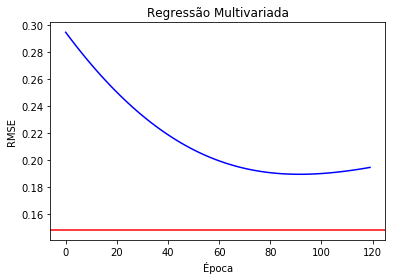

In [10]:
plt.plot(error_list, 'b-')
plt.title("Regressão Multivariada")
plt.axhline(y=0.148, color='r')
plt.xlabel('Época')
plt.ylabel(u'RMSE')

A regressão não chegou ao RMSEA de 0.148 de qualidade. A estimativa dos coeficientes com Gradiente Descendente Estocástico se aproximou rapidamente do RMSE esperado na época 83, chegando a 0,195. Contudo, o erro voltou a crescer, mesmo com passo de aprendizagem curto.